In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Plotting U.S. Bituminous coal emissions since 1850

In [2]:
data_path = "../emissions_high_granularity2022_for_modeling.xlsx"

In [3]:
BituminousData = pd.read_excel(data_path, 
                               sheet_name='Bituminous coal country',
                               usecols=['year','parent_entity','headquarters','parent_type','product_emissions_MtCO2'])
BituminousData.head()

,year,parent_entity,headquarters,parent_type,product_emissions_MtCO2
0,1996,Alliance Resource Partners,USA,Investor-owned Company,19.910933
1,1997,Alliance Resource Partners,USA,Investor-owned Company,24.114352
2,1998,Alliance Resource Partners,USA,Investor-owned Company,29.645166
3,1999,Alliance Resource Partners,USA,Investor-owned Company,31.193794
4,2000,Alliance Resource Partners,USA,Investor-owned Company,30.308864


In [4]:
total_emis_col = "product_emissions_MtCO2"

In [5]:
bd_data = BituminousData.set_index(['year','headquarters'], drop=True)

In [6]:
bd_data = BituminousData.pivot_table(index=['year'],
                     columns='headquarters',
                     values=total_emis_col,
                     aggfunc='sum')

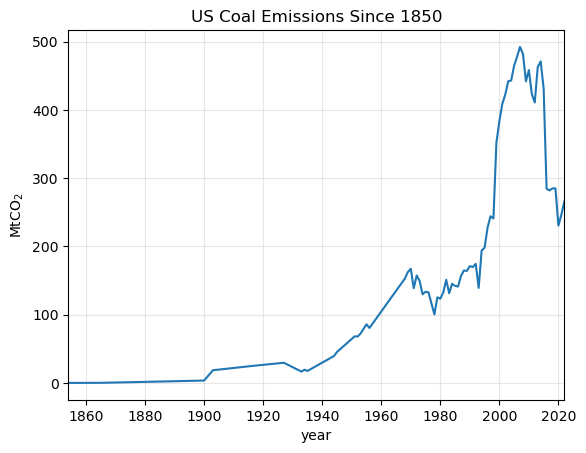

In [7]:
fig, ax = plt.subplots()
bd_data['USA'].plot(ax=ax)
ax.set_title("US Coal Emissions Since 1850")
ax.set_ylabel(r"MtCO$_2$")
ax.set_xlim(1854, 2022)
ax.grid(alpha=0.3)
plt.savefig("us_coal_since_1854.png", dpi=400)

## Plotting all of the U.S. emissions by source

In [8]:
dataset = pd.read_excel(data_path, None)

Anthracite coal country
USA not represented.
Bituminous coal country
Cement country
USA not represented.
Lignite coal country
Metallurgical coal country
Natural gas country
Oil NGL country
Sub bituminous coal country
Thermal coal country


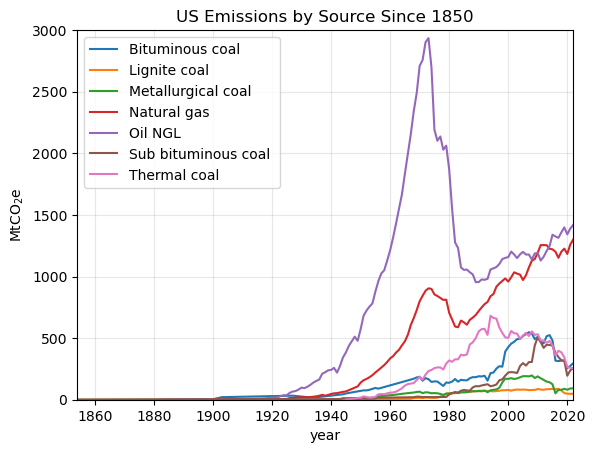

In [9]:
fig, ax = plt.subplots()
for sheet in dataset:
    if "country" in sheet:
        print(sheet)
        df = dataset[sheet]
        df = df.pivot_table(index=['year'],
                     columns='headquarters',
                     values= 'total_emissions_MtCO2e',
                     aggfunc='sum')
        try:
            df['USA'].plot(ax=ax, label=sheet.strip('country'))
        except KeyError:
            print("USA not represented.")
ax.set_title("US Emissions by Source Since 1850")
ax.set_ylabel(r"MtCO$_{2}$e")
ax.set_xlim(1854, 2022)
ax.set_ylim(0,3000)
ax.legend()
ax.grid(alpha=0.3)
plt.savefig("us_emissions_by_source_since_1850.png", dpi=400)